<a href="https://colab.research.google.com/github/NeevSabhani/Data-Science/blob/main/Unit8/NeevSabh_Unit8ExercisesSF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unit 8 Exercises: The Art of BART

These exercises are grouped into two parts:

- Questions on the nature of decision trees, random forests, and BART models
- An oppurtunity to practice implementing and analyzing a BART model.

Enjoy!

## Bartian Theory

**Task1**:

Draw a decision tree--on a physical piece of paper--that predicts how much time you'll spend studying on a given day, using the amount of sleep you got the night before as a predictor.

If this seems to easy, then add another variable or two (test tomorrow? activity after school?), and/or increase the depth of your tree.

You do not have to show me or turn in your tree to earn credit for this question, although I would like to see your drawing.

**Task2**:

What is a decision tree? How do they work?

A decision tree is a model used for decision-making or predictions, structured like a tree with nodes representing decisions based on input features. The root node makes the first decision based on the most important feature, while internal nodes continue to split data by other features, and branches represent the outcomes of these decisions. The leaf nodes show the final prediction or classification. Decision trees recursively split data based on criteria like information gain, continuing until a stopping condition is met.

**Task3**:

What does the "depth" of a decision tree mean?

How do I know if a tree is too deep, or not deep enough?

The **depth** of a decision tree refers to the number of levels or layers from the root node to the furthest leaf node. It represents the number of decisions (splits) made to reach a final outcome.

A tree is **too deep** if it overfits the data, meaning it captures noise or irrelevant patterns, resulting in poor generalization to new, unseen data. A tree is **not deep enough** if it underfits the data, meaning it is too simple to capture the underlying patterns and relationships, leading to low accuracy. To find the right depth, you typically balance between overfitting and underfitting by using techniques like cross-validation, pruning, or setting a maximum depth based on the data and task at hand.

**Task4:**

How are BART models similar and different from a decision tree?

BART models use multiple decision trees within a random forest, encouraging diversity among the trees through a process known as "boosting," where each tree is adjusted based on the others to ensure they differ. Additionally, BART applies regularizing priors to limit tree depth, keeping it much smaller than the number of data points and focusing the model’s attention near the observed data.

**Task5**:

Why would we use a BART model instead of a decision tree?

Decision trees prioritize speed over accuracy by computing only pseudo-posterior means and ignoring variation, making them susceptible to both underfitting and overfitting. In contrast, BART models are slower but account for variation and use techniques like boosting to reduce underfitting and MCMC with regularizing priors to prevent overfitting.

## Bartian Penguins

In [ ]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc as pm
import seaborn as sns
!pip install pymc-bart
import pymc_bart as pmb

**Task6**:

Create a BART model that uses flipper length, bill depth, and bill length to predict body mass in penguins, and make a ppc to check its fit

Code for loading the data is below. You'll need to do everything else yourself.

Remember to use my notes as a reference, and to copy and paste from them when it makes sense to.

Oh, and try a normal likelihood.

In [ ]:
#drop the incomplete rows from the data
url="https://raw.githubusercontent.com/thedarredondo/data-science-fundamentals/main/Data/penguins.csv"
penguins = pd.read_csv(url).dropna()
penguins

,species,island,bill_length,bill_depth,flipper_length,body_mass,sex,year
0,Adelie,Torgersen,3.91,1.87,18.1,3.750,male,2007
1,Adelie,Torgersen,3.95,1.74,18.6,3.800,female,2007
2,Adelie,Torgersen,4.03,1.80,19.5,3.250,female,2007
4,Adelie,Torgersen,3.67,1.93,19.3,3.450,female,2007
5,Adelie,Torgersen,3.93,2.06,19.0,3.650,male,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,5.58,1.98,20.7,4.000,male,2009
340,Chinstrap,Dream,4.35,1.81,20.2,3.400,female,2009
341,Chinstrap,Dream,4.96,1.82,19.3,3.775,male,2009
342,Chinstrap,Dream,5.08,1.90,21.0,4.100,male,2009


In [ ]:
clmn_list = ["species", "island", "bill_length", "bill_depth", "flipper_length", "body_mass", "sex", "year"]
peng_stats = penguins.loc[:,clmn_list].dropna()
peng_stats.head()

,species,island,bill_length,bill_depth,flipper_length,body_mass,sex,year
0,Adelie,Torgersen,3.91,1.87,18.1,3.75,male,2007
1,Adelie,Torgersen,3.95,1.74,18.6,3.80,female,2007
2,Adelie,Torgersen,4.03,1.80,19.5,3.25,female,2007
4,Adelie,Torgersen,3.67,1.93,19.3,3.45,female,2007
5,Adelie,Torgersen,3.93,2.06,19.0,3.65,male,2007


In [ ]:
X = peng_stats[["flipper_length", "bill_depth", "bill_length"]]
Y = peng_stats["body_mass"].to_numpy()


with pm.Model() as model_pengs:
    s = pm.HalfNormal('s', 10)
    μ_ = pmb.BART("μ_", X, np.log(Y), m=50)
    μ = pm.Deterministic("μ",pm.math.exp(μ_))
    y = pm.Normal("y", mu=μ, sigma=s, observed=Y)
    idata_pengs = pm.sample(compute_convergence_checks=False)

Output()

Output()

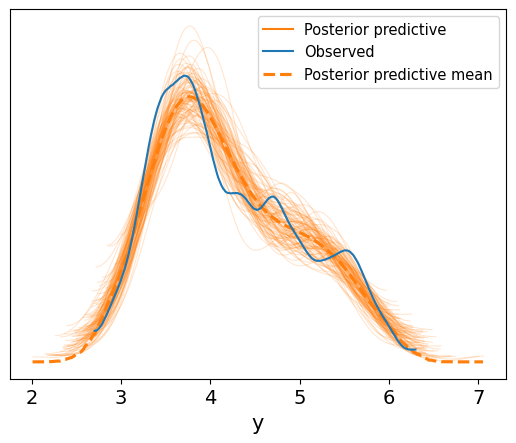

In [ ]:
pm.sample_posterior_predictive(idata_pengs,model_pengs, extend_inferencedata=True)
ax = az.plot_ppc(idata_pengs, num_pp_samples=100, colors=["C1", "C0", "C1"])

**Task7**:

Plot flipper length versus body mass,

and then plot the posterior predictve from the model over the data.
You're going to copy paste the plotting code from the notes, fyi.

<Axes: xlabel='flipper_length', ylabel='body_mass'>

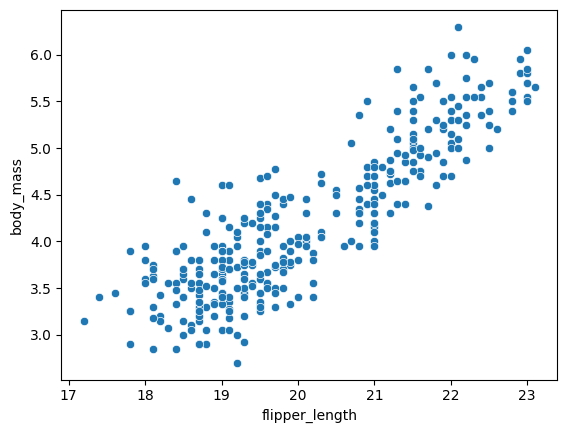

In [ ]:
sns.scatterplot(data = peng_stats, y = 'body_mass', x = 'flipper_length')

/usr/local/lib/python3.11/dist-packages/arviz/plots/hdiplot.py:166: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  hdi_data = hdi(y, hdi_prob=hdi_prob, circular=circular, multimodal=False, **hdi_kwargs)


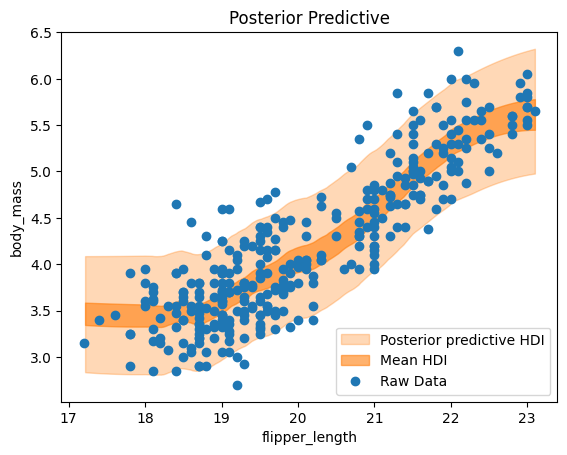

In [ ]:
posterior_mean = idata_pengs.posterior["μ"]

μ_hdi = az.hdi(ary=idata_pengs, group="posterior", var_names=["μ"], hdi_prob=0.74)

pps = az.extract(
    idata_pengs, group="posterior_predictive", var_names=["y"]
).T


idx = np.argsort(X.to_numpy()[:, 0]) #grab first row
fig, ax = plt.subplots()

az.plot_hdi(
    x=X.to_numpy()[:, 0],#grab first row
    y=pps,
    ax=ax,
    hdi_prob=0.93,
    fill_kwargs={"alpha": 0.3, "label": r"Posterior predictive HDI"},
)

az.plot_hdi(
    x=X.to_numpy()[:, 0],#grab first row
    y=posterior_mean,
    ax=ax,
    hdi_prob=0.74,
    fill_kwargs={"alpha": 0.6, "label": r"Mean HDI"},
)
ax.plot(peng_stats['flipper_length'], peng_stats["body_mass"], "o", c="C0", label="Raw Data")
ax.legend(loc="lower right")
ax.set(
    title="Posterior Predictive",
    xlabel="flipper_length",
    ylabel="body_mass",
);

**Task8**:

Interpret the plot above in context. Do you think it captures the true association between flipper length and body mass in penguins? Why or why not? Make sure to reference specific things you see in the plot.

Yes, I think the plot makes sense and accurately reflects the true relationship between flipper length and body mass in penguins. It captures the overall upward trend and leveling off effectively without overfitting and ignoring not needed noise.

**Task9**:

Create partial depnedence plots (pdps), individual conditional expectation (ice) plots, and a variable importance plot for the BARTpenguin model.

array([<Axes: xlabel='flipper_length'>, <Axes: xlabel='bill_depth'>,
       <Axes: xlabel='bill_length'>], dtype=object)

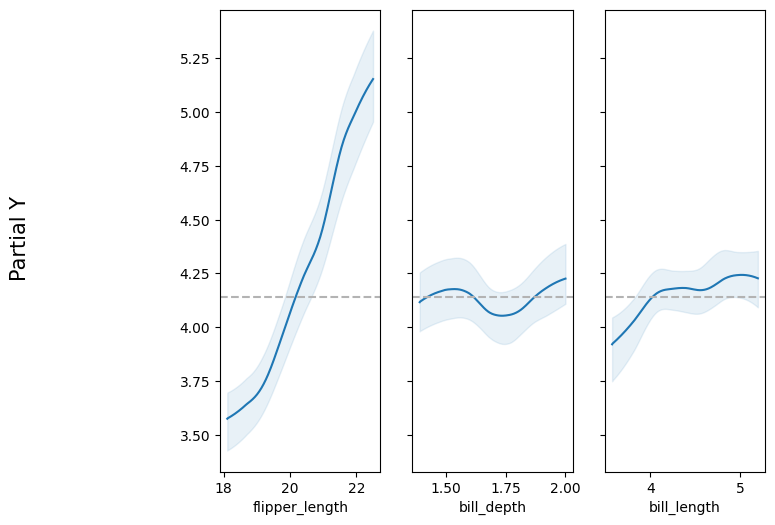

In [ ]:
pmb.plot_pdp(μ_, X, Y, grid=(1, 5), func=np.exp, figsize = (12,6))

array([<Axes: xlabel='flipper_length'>, <Axes: xlabel='bill_depth'>,
       <Axes: xlabel='bill_length'>], dtype=object)

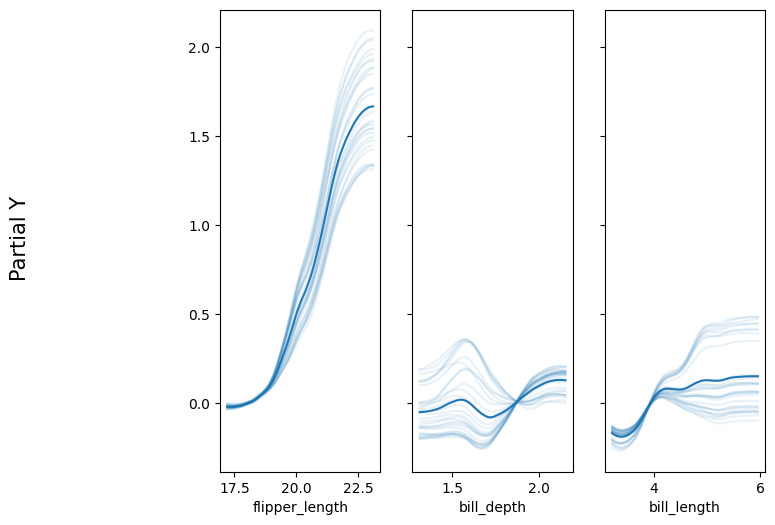

In [ ]:
pmb.plot_ice( μ_, X, Y, grid=(1, 5), func=np.exp, figsize = (12,6))

<Axes: ylabel='R²'>

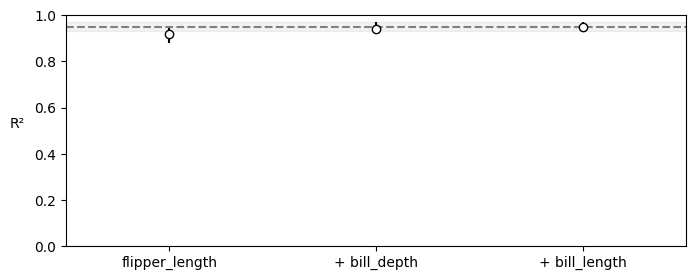

In [ ]:
vi_pengs = pmb.compute_variable_importance(idata_pengs, μ_, X)
pmb.plot_variable_importance(vi_pengs)

**Task10**:

Using the above plots, make an argument about which variable(s) is/are most important in predicting body mass in penguins.

What is the relationship for each variable to body mass, when you take the other variables into account?

Is that relationship complicated by interactions between variables? How do you know?

Make sure to reference specific things you see in each plot, to justify your decisions and comments.



The independent variable plot shows that flipper length alone drives the R² value to around 0.95, meaning that it almost single-handedly accounts for most of the variation in penguin body mass. Adding bill length and bill depth has little to no effect on the model's predictive power. This is further supported by the partial dependence and individual conditional expectation plots (PDP and ICE), where flipper length shows a clear and nearly linear correlation with body mass. In contrast, bill length and bill depth produce wavy, non-linear patterns, indicating much weaker associations. The ICE plot also reveals that at extreme values—such as high flipper length, high bill length, or low bill depth—there may be subtle interactions between variables. Overall, while minor relationships may exist at the extremes, flipper length stands out as the dominant and most reliable predictor of body mass in penguins.